# GRIP : The Saprk Foundation

# Data Science And Buisness Analytics Intern

# Author : Atharv Bhilare

# Task 2 : Prediction Using Unsupervised ML

Importing Required Librabies

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib Inline
import warnings
warnings.filterwarnings('ignore')

Reading Data

In [2]:
dataset=pd.read_csv("Iris.csv")

Data Preprocessing

In [3]:
dataset.shape
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
dataset=dataset.drop(columns=["Species","Id"],axis=1)

Standardized Data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std_dataset=scaler.fit_transform(dataset) # in array form
std_dataset=pd.DataFrame(std_dataset,columns=dataset.columns) # make data frame
std_dataset.tail() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956
149,0.068662,-0.124958,0.762759,0.790591


Using Hierarchical Clusturing

Create Dendogram

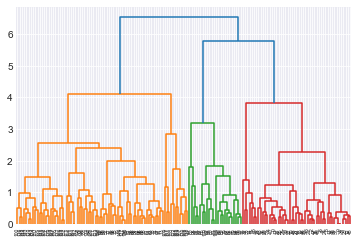

In [40]:
# we can visualize subjective cluster
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(std_dataset,method='complete'))
plt.style.use('seaborn-darkgrid')
plt.show()

Using K-Means Clusturing

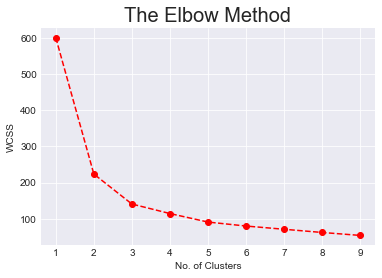

In [44]:
from sklearn.cluster import KMeans
WCSS = []  #within cluster sum of square
for i in range(1,10):
    kmean = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmean.fit(std_dataset)
    WCSS.append(kmean.inertia_)
    
plt.plot(range(1,10),WCSS,'go--',color='red')
plt.title('The Elbow Method',size=20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
# Build cluster algorithm
kmean = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
clusters = kmean.fit_predict(std_dataset)

#Add a now column(label)
std_dataset['Clusters'] = kmean.labels_
std_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1


In [49]:
# we can check values in each clusters
std_dataset['Clusters'].value_counts()

0    53
1    50
2    47
Name: Clusters, dtype: int64

BUILD A TWO DIMENSIONS CLUSTER AGAIN

In [51]:
# get centroids
centroids = kmean.cluster_centers_
cen_x = [i[0] for i in centroids] # find center from x-axis for each clusters(we get 3 values)
cen_y = [i[1] for i in centroids]


## add to dataset
std_dataset['cen_x'] = std_dataset.Clusters.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
std_dataset['cen_y'] = std_dataset.Clusters.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
std_dataset['c'] = std_dataset.Clusters.map({0:colors[0], 1:colors[1], 2:colors[2]})

std_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters,cen_x,cen_y,c
0,-0.900681,1.032057,-1.341272,-1.312977,1,-1.014579,0.842307,#81DF20
1,-1.143017,-0.124958,-1.341272,-1.312977,1,-1.014579,0.842307,#81DF20
2,-1.385353,0.337848,-1.398138,-1.312977,1,-1.014579,0.842307,#81DF20
3,-1.506521,0.106445,-1.284407,-1.312977,1,-1.014579,0.842307,#81DF20
4,-1.021849,1.263460,-1.341272,-1.312977,1,-1.014579,0.842307,#81DF20


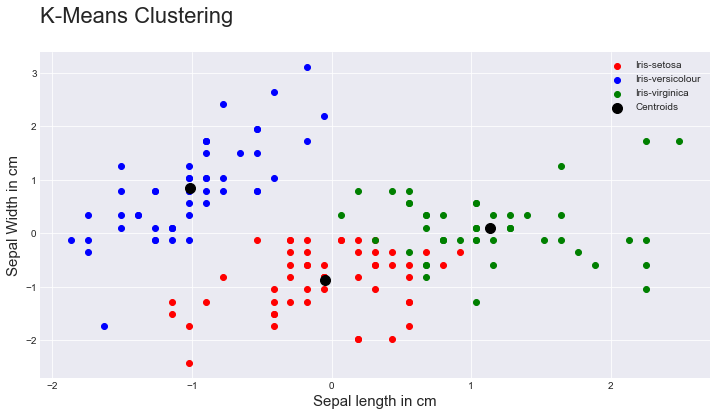

In [53]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12,6))
X = std_dataset.iloc[:,:4].values
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1],  c = 'red', label = 'Iris-setosa')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], c = 'green', label = 'Iris-virginica')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids') #centroids
plt.title('K-Means Clustering\n', loc='left', fontsize=22)
plt.xlabel('Sepal length in cm',fontsize=15)
plt.ylabel('Sepal Width in cm',fontsize=15)
plt.legend();plt.show()